In [1]:
# Naive Bayes with Balanced and Cleaned Data for Product Review Sentiment Analysis

import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

In [2]:
# Download stopwords and tokenizer
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [3]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(next(iter(uploaded.keys())))

Saving dataset_wardah.csv to dataset_wardah.csv


In [4]:
import nltk
nltk.download('punkt_tab')

# Data Preprocessing - Further clean ambiguous reviews (e.g., with rating 3)
df = df[df['rating_star'] != 3]  # Remove neutral reviews with a rating of 3

# Apply preprocessing to the 'review' column
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters and numbers
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)
df['label'] = df['rating_star'].apply(lambda x: 1 if x > 3 else 0)  # 1 for Positive, 0 for Negative

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_review'], df['label'], test_size=0.2, random_state=42)

In [6]:
# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [7]:
# Calculate class weights based on the training set
class_0_weight = (len(y_train) - sum(y_train)) / len(y_train)  # Proportion of Negative class
class_1_weight = sum(y_train) / len(y_train)  # Proportion of Positive class

In [8]:
# Naive Bayes with class priors
nb_model = MultinomialNB(class_prior=[class_0_weight, class_1_weight])
nb_model.fit(X_train_tfidf, y_train)

MultinomialNB(class_prior=[0.07523510971786834, 0.9247648902821317])

In [9]:
# Predict and evaluate
y_pred = nb_model.predict(X_test_tfidf)
print("Naive Bayes with Class Priors Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

Naive Bayes with Class Priors Accuracy: 0.9208333333333333
Classification Report:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        19
    Positive       0.92      1.00      0.96       221

    accuracy                           0.92       240
   macro avg       0.46      0.50      0.48       240
weighted avg       0.85      0.92      0.88       240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# Adjusting Thresholds for Naive Bayes (Optional)
y_pred_proba = nb_model.predict_proba(X_test_tfidf)
threshold = 0.6  # Increase threshold for Positive class to improve precision
y_pred_thresholded = (y_pred_proba[:, 1] >= threshold).astype(int)
print("\nNaive Bayes with Adjusted Threshold Accuracy:", accuracy_score(y_test, y_pred_thresholded))
print("Classification Report with Threshold Adjustment:\n", classification_report(y_test, y_pred_thresholded, target_names=['Negative', 'Positive']))


Naive Bayes with Adjusted Threshold Accuracy: 0.9208333333333333
Classification Report with Threshold Adjustment:
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00        19
    Positive       0.92      1.00      0.96       221

    accuracy                           0.92       240
   macro avg       0.46      0.50      0.48       240
weighted avg       0.85      0.92      0.88       240



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


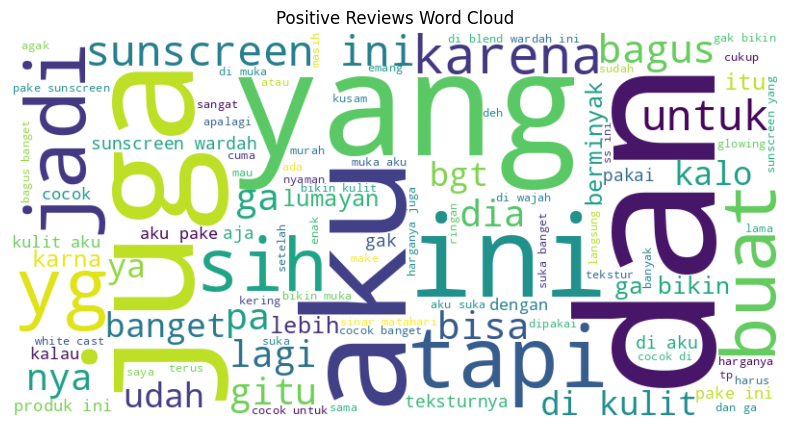

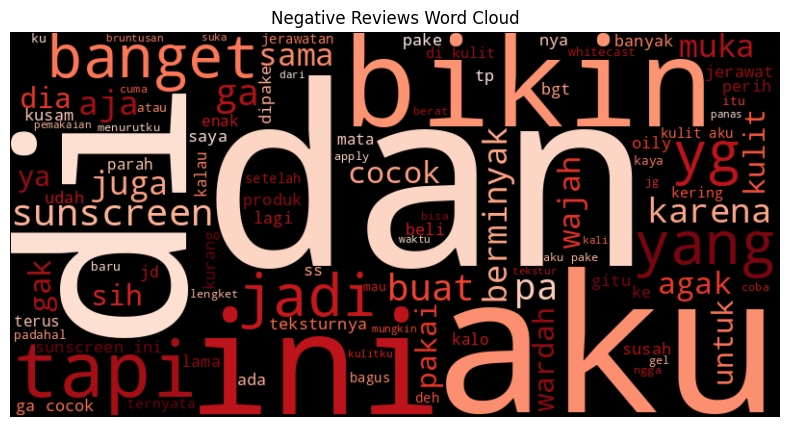

In [11]:
# Install wordcloud if needed
!pip install wordcloud

# Import libraries for visualization
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate word clouds for Positive and Negative reviews

# Separate positive and negative reviews
positive_reviews = df[df['label'] == 1]['cleaned_review']
negative_reviews = df[df['label'] == 0]['cleaned_review']

# Create a single string for each sentiment
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generate word cloud for Positive reviews
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

# Generate word cloud for Negative reviews
plt.figure(figsize=(10, 5))
wordcloud_neg = WordCloud(width=800, height=400, background_color='black', colormap='Reds', max_words=100).generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

In [12]:
# Import libraries for saving models
import pickle
import joblib

# Train the Naive Bayes model with the code provided above
nb_model = MultinomialNB(class_prior=[class_0_weight, class_1_weight])
nb_model.fit(X_train_tfidf, y_train)

# Export the model to .sav and .pkl formats
# Save as .sav using joblib
joblib.dump(nb_model, 'naive_bayes_model.sav')

# Save as .pkl using pickle
with open('naive_bayes_model.pkl', 'wb') as file:
    pickle.dump(nb_model, file)

print("Model saved as 'naive_bayes_model.sav' and 'naive_bayes_model.pkl'")

Model saved as 'naive_bayes_model.sav' and 'naive_bayes_model.pkl'


In [14]:
# Assuming you have already defined and fitted the vectorizer as 'vectorizer'
import pickle

# Save the fitted vectorizer
with open('tfidf_vectorizer.sav', 'wb') as vec_file:
    pickle.dump(vectorizer, vec_file)

print("TF-IDF vectorizer saved as 'tfidf_vectorizer.sav'")


TF-IDF vectorizer saved as 'tfidf_vectorizer.sav'
